In [1]:
import csv
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
rows = []
with open("imdb_top_2000_movies.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)

In [3]:
print(header)

['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Genre', 'Director', 'Cast', 'Gross']


In [4]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('imdb_top_2000_movies.csv')

In [5]:
# Split the 'Cast' column by comma and create a list of all actors
all_actors = [actor.strip() for sublist in data['Cast'].str.split(',') for actor in sublist]

# Create a pandas Series from the list of actors and count their occurrences
actor_counts = pd.Series(all_actors).value_counts()

# Display the top actors with the most movies
print(actor_counts.head(10))

Tom Cruise               23
Tom Hanks                21
Robert De Niro           21
Nicolas Cage             19
Adam Sandler             18
Denzel Washington        15
Johnny Depp              15
Arnold Schwarzenegger    15
Mel Gibson               15
Bruce Willis             14
dtype: int64


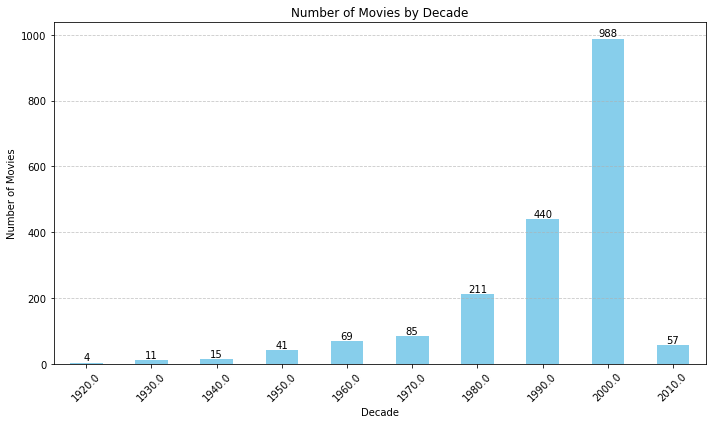

In [6]:
# Convert 'Release Year' column to integer type
data['Release Year'] = pd.to_numeric(data['Release Year'], errors='coerce')

# Drop rows with NaN values in 'Release Year' column
data = data.dropna(subset=['Release Year'])

# Extract the decade from the 'Release Year' column
data['Decade'] = (data['Release Year'] // 10) * 10

# Group movies by decade and count the number of movies in each decade
decade_counts = data.groupby('Decade').size()

# Plot the histogram
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add number value to each bar column
for i, value in enumerate(decade_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

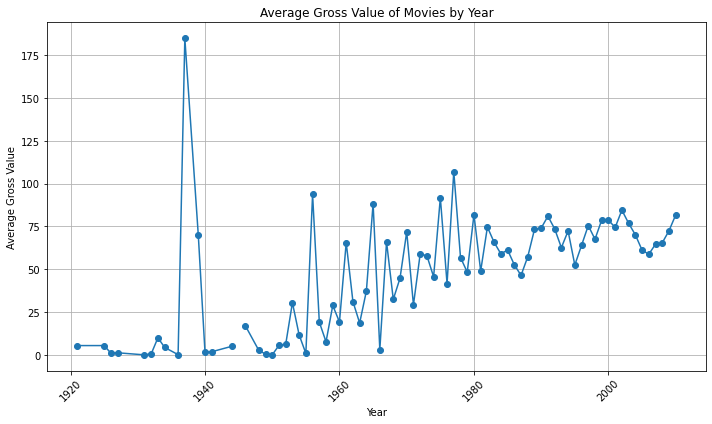

In [7]:
# Convert 'Release Year' column to integer type
data['Release Year'] = pd.to_numeric(data['Release Year'], errors='coerce')

# Drop rows with NaN values in 'Release Year' column
data = data.dropna(subset=['Release Year'])

# Remove all non-numeric characters from 'Gross' column
data['Gross'] = data['Gross'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert 'Gross' column to numeric
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Group movies by year and calculate the average gross value for each year
average_gross_by_year = data.groupby('Release Year')['Gross'].mean()

# Plot the data in a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_gross_by_year.index, average_gross_by_year.values, marker='o', linestyle='-')
plt.title('Average Gross Value of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Average Gross Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Remove all non-numeric characters from 'Gross' column
data['Gross'] = data['Gross'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert 'Gross' column to numeric
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
# Sort the DataFrame by 'Gross' column in descending order
top_ten_highest_grossing_movies = data.sort_values(by='Gross', ascending=False).head(10)
# Extract 'Movie Name' and 'Gross' columns
top_ten_movie_names_and_gross = top_ten_highest_grossing_movies[['Movie Name', 'Gross']]

# Display the top ten highest-grossing movies with their names and gross values
print(top_ten_movie_names_and_gross)


                                      Movie Name   Gross
1763                                      Avatar  760.51
511                                      Titanic  659.33
1508                             The Dark Knight  534.86
764    Star Wars: Episode I - The Phantom Menace  474.54
1076                                     Shrek 2  436.47
350                   E.T. the Extra-Terrestrial  435.11
1263  Pirates of the Caribbean: Dead Man's Chest  423.32
516                                The Lion King  422.78
1797                                 Toy Story 3  415.00
1012                                  Spider-Man  403.71


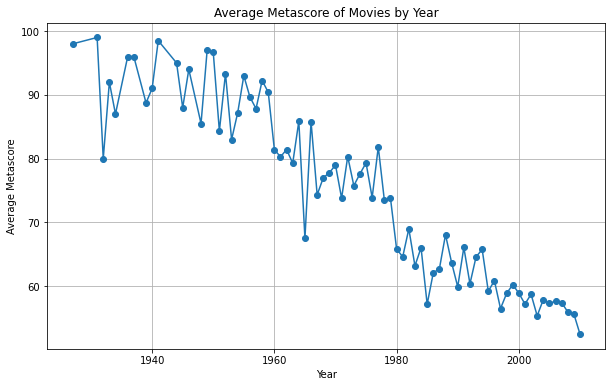

In [9]:
# Group movies by year and calculate the average Metascore for each year
average_metascore_by_year = data.groupby('Release Year')['Metascore'].mean()

# Plot the data in a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_metascore_by_year.index, average_metascore_by_year.values, marker='o', linestyle='-')
plt.title('Average Metascore of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Average Metascore')
plt.grid(True)
plt.show()

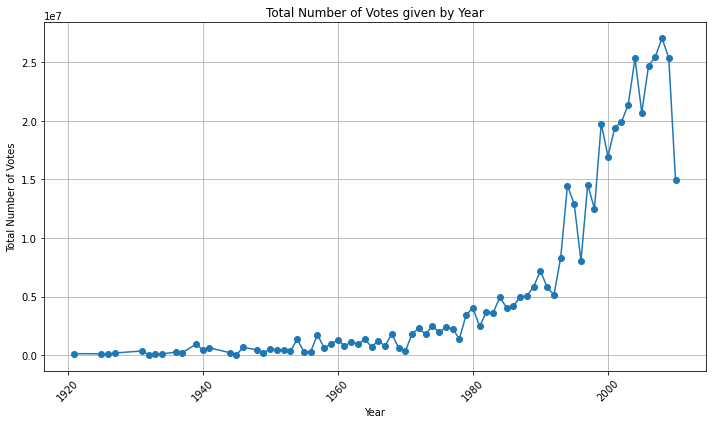

In [10]:
# Remove all non-numeric characters from 'Votes' column
data['Votes'] = data['Votes'].replace('[^\d.]', '', regex=True)

# Convert 'Votes' column to numeric
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Group movies by year and calculate the average number of votes per movie for each year
average_votes_by_year = data.groupby('Release Year')['Votes'].sum()

# Plot the data in a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_votes_by_year.index, average_votes_by_year.values, marker='o', linestyle='-')
plt.title('Total Number of Votes given by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

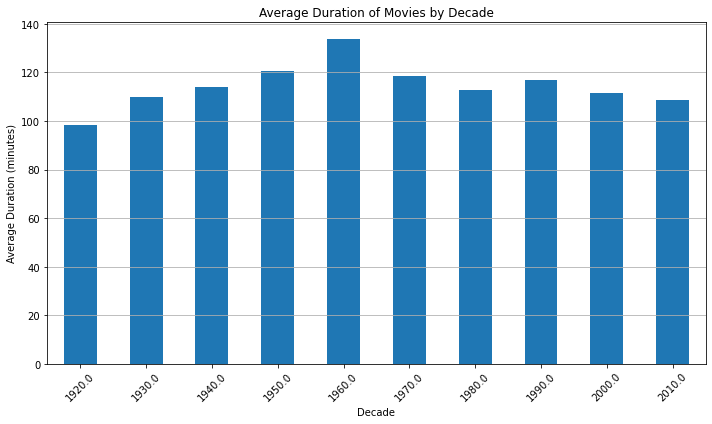

In [11]:
# Convert 'Release Year' column to integer type
data['Release Year'] = pd.to_numeric(data['Release Year'], errors='coerce')

# Drop rows with NaN values in 'Release Year' column
data = data.dropna(subset=['Release Year'])

# Assuming 'Release Year' is in the format 'YYYY'
# Extract decade from 'Release Year' and create a new column
data['Decade'] = (data['Release Year'] // 10) * 10

# Group movies by decade and calculate the average duration for each decade
average_duration_by_decade = data.groupby('Decade')['Duration'].mean()

# Plot the data in a bar graph
plt.figure(figsize=(10, 6))
average_duration_by_decade.plot(kind='bar')
plt.title('Average Duration of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

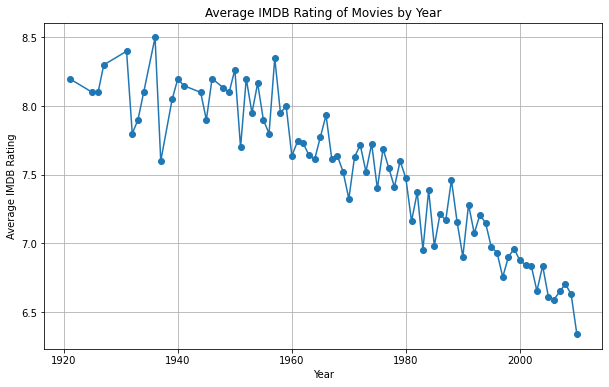

In [12]:
# Group movies by year and calculate the average Metascore for each year
average_imdbrating_by_year = data.groupby('Release Year')['IMDB Rating'].mean()

# Plot the data in a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_imdbrating_by_year.index, average_imdbrating_by_year.values, marker='o', linestyle='-')
plt.title('Average IMDB Rating of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()